## ANALYSIS

In [1]:
import pandas as pd
import numpy as np


# TODO : split the projection dataset -> use 30% of the dataset (non-ground-truth samples only)
df = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_3sigma/merged/flipped/VTAs/250um_table.csv')

In [2]:
df

,centerID,leadModel,patientID,contactID,verciseID,amplitude,massive_filename,mapping,mapping_score,part,lin_interp_score,step_interp_score,zeroed,tweening,tuning
0,Bern,Boston Scientific Vercise,1.0,0.0,0,1.0,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.074074,0.0,0.0,False,False
1,Bern,Boston Scientific Vercise,1.0,0.0,0,1.1,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.081481,0.0,0.0,True,False
2,Bern,Boston Scientific Vercise,1.0,0.0,0,1.2,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.088889,0.0,0.0,True,False
3,Bern,Boston Scientific Vercise,1.0,0.0,0,1.3,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.096296,0.0,0.0,True,True
4,Bern,Boston Scientific Vercise,1.0,0.0,0,1.4,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,1.0,0.103704,0.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39682,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.6,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,0.0,0.500000,0.5,0.0,True,True
39683,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.7,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,0.0,0.500000,0.5,0.0,True,False
39684,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.8,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,0.0,0.500000,0.5,0.0,True,True
39685,Cologne,Boston Scientific Vercise,240.0,3.0,3,4.9,/media/brainstimmaps/DATA/2009_DeepMaps01/03_D...,0.0,NaN,0.0,0.500000,0.5,0.0,True,False


In [3]:
print(df[df['centerID'] == 'Bern'].groupby(['patientID', 'verciseID']).ngroups)
print(df[df['centerID'] == 'Cologne'].groupby(['patientID', 'verciseID']).ngroups)

657
120


In [4]:
print(df[df['centerID'] == 'Bern'].groupby('patientID')['verciseID'].nunique().median())
print(df[df['centerID'] == 'Cologne'].groupby('patientID')['verciseID'].nunique().median())

16.0
4.0


In [5]:
print(df[df['centerID'] == 'Bern'].groupby('patientID')['verciseID'].nunique().mean())
print(df[df['centerID'] == 'Cologne'].groupby('patientID')['verciseID'].nunique().mean())

14.282608695652174
4.0


In [6]:
print(df[df['leadModel'] == 'Medtronic 3389'].groupby('patientID')['verciseID'].nunique().median())

3.0


In [7]:
a = df['leadModel'] == 'Boston Scientific Vercise'
b = df['centerID'] == 'Cologne'

print(df[a & b].groupby('patientID')['verciseID'].nunique().mean())

4.6


In [8]:
a = df['mapping_score'] == 1.0
b = df['centerID'] == 'Bern'

print(df[a & b].groupby('patientID')['verciseID'].nunique().sum())

532


In [42]:
import plotly.graph_objects as go
from ipywidgets import interact, widgets

# Columns of interest
columns_of_interest = ['centerID', 'leadModel', 'patientID', 'verciseID', 'amplitude', 'mapping', 'tweening', 'tuning', 'mapping_score']

def plot_data(df, **kwargs):
    df_filtered = df.copy()

    for col, value in kwargs.items():
        if value != 'free':
            df_filtered = df_filtered[df_filtered[col] == value]

    total_length = len(df_filtered)
    
    # Initialize data for plotly
    bar_data = []
    
    annotations = []  # Initialize annotations list
    
    for i, col in enumerate(columns_of_interest):
        bottom = 0
        counts = df_filtered[col].value_counts().sort_index()

        total_for_col = df_filtered[col].nunique()  # Number of unique values for the current column

        for value, count in counts.items():
            bar_data.append(go.Bar(
                x=[col],
                y=[count],
                hoverinfo="text+name",
                hovertemplate=f"{value}<br>: {count}",  # Customize your hover template here
                name=f"{value} : {count}",
                orientation='v',
                base=bottom
            ))
            bottom += count
        
        annotations.append(  # Append new annotation
            dict(
                x=col,
                y=bottom*1.07,
                xref="x",
                yref="y",
                text=str(total_for_col),
                showarrow=False
            )
        )
        
    # Customize layout
    layout = go.Layout(
        title=f'Total = {total_length}',
        xaxis=dict(title='Columns'),
        yaxis=dict(title='Count'),
        barmode='stack',
        annotations=annotations,  # Set annotations
        showlegend=False
    )

    fig = go.Figure(data=bar_data, layout=layout)

    fig.show()

dropdowns = {}
for col in columns_of_interest:
    uniques = list(df[col].unique())
    options = ['free'] + uniques
    dropdowns[col] = widgets.Dropdown(options=options, description=f'{col}:')

interact(lambda **kwargs: plot_data(df, **kwargs), **dropdowns)


interactive(children=(Dropdown(description='centerID:', options=('free', 'Bern', 'Cologne'), value='free'), Dr…

<function __main__.<lambda>(**kwargs)>

In [ ]:
for col in ('centerID', 'leadModel', 'patientID'):
    print(f"Column '{col}' unique values:")
    print(df[col].value_counts())
    print('-'*20)

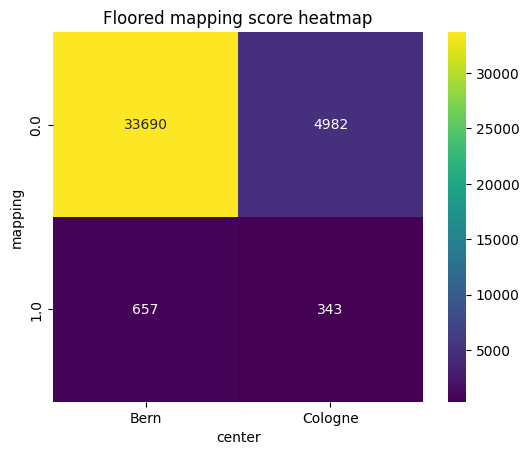

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_3sigma/merged/flipped/tables_tweened/250um.csv')

# Group by centerID and mapping_score and count the rows
df['mapping_score'] = df['mapping_score'].apply(np.floor)

grouped = df.groupby(['center', 'mapping']).size().reset_index(name='count')


# Pivot the table to get a 2x2 matrix
pivot_table = grouped.pivot(index='mapping', columns='center', values='count')

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, cmap='viridis', cbar=True, square=True, fmt="d")
plt.title("Floored mapping score heatmap")
plt.show()

In [9]:
import glob
import pandas as pd

CV_TYPE = 'loco'

model_name = 'ProjNetMerged4'
filepaths = glob.glob('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/'
    f'models/predict_{CV_TYPE}/{model_name}/perf/*')

filepaths.sort()
filepath = filepaths[-1]
print(filepath)

df = pd.read_csv(filepath)
df

/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/models/predict_loco/ProjNetMerged4/perf/23.09.28.15:54:57.csv


,center,cohort,lead_model,patient,lead,hemisphere,contact,vercise,directional,ring,...,split_7,split_8,split_9,split_10,noisy,original_vta,added_voxels,total_voxels,prediction_rounded,prediction
0,Bern,B01,B.S. Vercise,1,1.0,right,0,0,False,R0,...,tuning,tuning,testing,tuning,False,NaN,0.0,3.0,0.0,0.002689
1,Bern,B01,B.S. Vercise,1,1.0,right,0,0,False,R0,...,tuning,testing,tuning,tuning,False,NaN,0.0,3.0,0.0,0.002839
2,Bern,B01,B.S. Vercise,1,1.0,right,0,0,False,R0,...,tuning,tuning,testing,tuning,False,NaN,0.0,3.0,0.0,0.003075
3,Bern,B01,B.S. Vercise,1,1.0,right,0,0,False,R0,...,tuning,tuning,testing,tuning,False,NaN,0.0,12.0,0.0,0.005292
4,Bern,B01,B.S. Vercise,1,1.0,right,0,0,False,R0,...,tuning,testing,testing,testing,False,NaN,0.0,12.0,0.0,0.005292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590823,Cologne,C01,M. 3389,220,220.0,right,3,7,False,R3,...,testing,testing,testing,testing,True,22448.0,5.0,101.0,NaN,NaN
590824,Cologne,C01,M. 3389,217,217.0,right,1,16,False,R1,...,tuning,tuning,testing,tuning,True,22234.0,0.0,11.0,NaN,NaN
590825,Cologne,C01,M. 3389,205,205.0,right,0,0,False,R0,...,testing,testing,tuning,testing,True,21134.0,2.0,102.0,NaN,NaN
590826,Cologne,C02,B.S. Vercise,238,238.5,left,10,10,True,NaN,...,testing,testing,testing,testing,True,23905.0,0.0,132.0,NaN,NaN


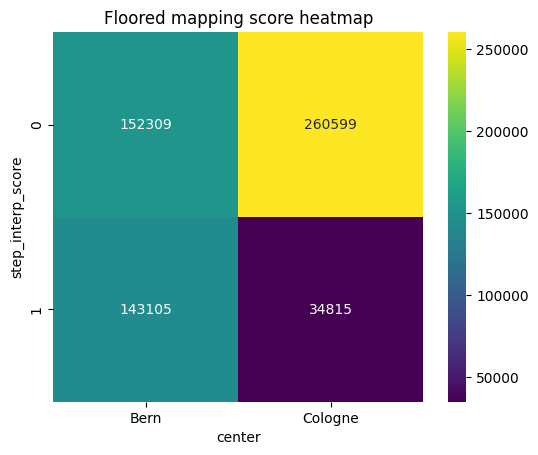

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_3sigma/merged/flipped/tables_tweened/250um.csv')
thresh = 0.8330957480952411
# Group by centerID and mapping_score and count the rows
df['step_interp_score'] = df['step_interp_score'].apply(lambda x : np.where(x > thresh, 1, 0))

grouped = df.groupby(['center', 'step_interp_score']).size().reset_index(name='count')


# Pivot the table to get a 2x2 matrix
pivot_table = grouped.pivot(index='step_interp_score', columns='center', values='count')

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, cmap='viridis', cbar=True, square=True, fmt="d")
plt.title("Floored mapping score heatmap")
plt.show()

In [ ]:
print(f'If we draw a random negative sample there is a {298/(298.+125.):.2%} chance it comes from Cologne')
print(f'If we draw a random positive sample there is a {532/(532.+45.):.2%} chance it comes from Bern')

In [ ]:
# Define a range of thresholds
thresholds = np.linspace(0, 1, 100)
results = []

for threshold in thresholds:
    # Threshold the mapping_score
    df['thresholded_score'] = (df['lin_interp_score'] >= threshold).astype(int)
    
    # Compute proportions for each combination
    proportions = df.groupby(['centerID', 'thresholded_score']).size() / len(df)
    
    # Store proportions in results
    results.append({
        '(Bern, 1)': proportions.get(('Bern', 1), 0),
        '(Bern, 0)': proportions.get(('Bern', 0), 0),
        '(Cologne, 1)': proportions.get(('Cologne', 1), 0),
        '(Cologne, 0)': proportions.get(('Cologne', 0), 0),
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot superimposed columns
ax = results_df.plot(kind='bar', stacked=True, figsize=(12,6), width=1.0, edgecolor='white')
plt.title('Proportions based on mapping_score threshold')
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.xticks(ticks=range(0, 100, 10), labels=np.round(thresholds[::10], 2), rotation=45)
ax.margins(x=0)  # Remove any margin between bars
plt.tight_layout()
plt.show()

In [ ]:
score_type = 'lin_interp_score'

# Define a range of thresholds
thresholds = np.linspace(0, 1, 100)
results = []

for threshold in thresholds:
    # Threshold the mapping_score
    df['thresholded_score'] = (df[score_type] < threshold).astype(int)
    
    # Compute proportions for each combination
    proportions = df.groupby(['centerID', 'thresholded_score']).size() / len(df)
    
    # Store proportions in results
    results.append({
        '(Bern, 1)': proportions.get(('Bern', 1), 0),
        '(Cologne, 1)': proportions.get(('Cologne', 1), 0),
        '(Bern, 0)': proportions.get(('Bern', 0), 0),
        '(Cologne, 0)': proportions.get(('Cologne', 0), 0),
    })

color_dict = {'(Bern, 1)': '#3B0D11', # dark brown 
              '(Cologne, 1)': '#33495C', # dark blue 
              '(Bern, 0)' : '#B36D6B', # light brown
              '(Cologne, 0)' : '#83B5D1'} # light blue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot superimposed columns
ax = results_df.plot(kind='bar', stacked=True, figsize=(12,6), width=1.0, color=color_dict)
plt.title(f'{score_type} proportions based on threshold')
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.xticks(ticks=range(0, 100, 10), labels=np.round(thresholds[::10], 2), rotation=45)
plt.hlines(0.5, -1, 100, colors='red')
ax.margins(x=0)  # Remove any margin between bars
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique_centers = df['centerID'].unique()

sns.displot(data=df, x='step_interp_score', hue='centerID')    #df[df['centerID'] == center]['mapping_score'].hist(ax=ax, edgecolor='black')


plt.tight_layout()
plt.show()

In [ ]:
len(VTAs) == len(df)

In [ ]:
df.head(1)

## SPLIT

In [1]:
import numpy as np
import pandas as pd

    
# Filter rows where 'mapping' is 0 and then sample 40% for 'tuning'
for i in range(1, 4):
    for resolution in (250, 500, 1000):
        df = pd.read_csv(f'/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_{i}sigma/merged/flipped/tables_tweened/{resolution}um.csv')
        for n in range(1, 11):
            tuning_df = df[df['mapping'] == 0].groupby(['center', 'patient','contact'], group_keys=False).apply(lambda x: x.sample(frac=0.4))
            tuning_indices = tuning_df.index.tolist()
            df[f'split_{n}'] = df.index.to_series().apply(lambda x: 'tuning' if x in tuning_indices else 'testing')

        df.to_csv(f'/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/processed/stn_space_{i}sigma/merged/flipped/tables_tweened/{resolution}um.csv', index=False)

# 3m42s for 10 splits

In [ ]:
print(len(tuning_df), len(testing_df), len(tuning_VTAs), len(testing_VTAs))
print(len(tuning_df)+len(testing_df), len(df))
print(len(tuning_VTAs)+len(testing_VTAs), len(VTAs))
print(len(tuning_df)/len(df))